## <span style="color:red"> Homework 3 </span>

With your toy dataset, now select an appropriate quantitative outcome - the same one you used for the homework on regression or another. <br> 
All the other variables are to be used as predictors. <br>
Be careful: ID variables should not be part of the modeling !

### Step 1 : Reading Assignment

As usual, the reading assignment is part of the next quiz

Read Section 8.2 (pp 343-354) of our Textbook [An Introduction to Statistical Learning - with Applications in Python](https://www.statlearning.com/)

### Step 2 : Handling categorical data

There are mainly two ways of handling categorical data :

1. One-hot encoding (OHE). Use pd.get_dummies or sklearn `OneHotEncoder modules`.<br>
    a. First explain what OHE accomplishes, in a small paragraph with its up and down sides.<br>
    b. Apply OHE to all of your categorical variables.<br>
    
2. Numericalization. Use sklearn LabelEncoder or better yet the method `astype('category')` followed by the attributes `.cat.codes` <br>
    a. First explain what numericalization entails with its up and down sides. <br>
    b. Apply numericalization on your chosen categorical variables. <br>

In [1]:
# Packages
import pandas as pd
import jupyter_black

jupyter_black.load()
import os

In [2]:
os.getcwd()

'/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/homework03'

In [3]:
PATH = r"/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/homework01/data"

In [4]:
# read csv
os.chdir(PATH)
df = pd.read_csv("customer_data_cbn.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 12873 non-null  float64
 1   number_vmail_messages          12873 non-null  float64
 2   total_day_minutes              12873 non-null  float64
 3   total_day_calls                12873 non-null  float64
 4   total_day_charge               12873 non-null  float64
 5   total_eve_minutes              12873 non-null  float64
 6   total_eve_calls                12873 non-null  float64
 7   total_eve_charge               12873 non-null  float64
 8   total_night_minutes            12873 non-null  float64
 9   total_night_calls              12873 non-null  float64
 10  total_night_charge             12873 non-null  float64
 11  total_intl_minutes             12873 non-null  float64
 12  total_intl_calls               12873 non-null 

In [35]:
# define the columns

numerical_features = df.iloc[:, 0:14].columns.tolist()
categorical_ohe_features = (
    df.iloc[:, 15:].drop(columns=["state", "churn"], axis=1).columns.tolist()
)
categorical_lab_features = df[["state"]].columns.tolist()

In [14]:
# split the predictors and target

predictors = df.drop(columns=["account_length", "churn"], axis=1)
target = df["account_length"]

In [15]:
# Apply the lable encoding on the predictors

predictors["state"] = predictors["state"].astype("category").cat.codes

In [16]:
# Apply the ohe on the predictors

predictors = pd.get_dummies(
    predictors,
    columns=df.iloc[:, 14:].drop(columns=["state", "churn"], axis=1).columns.tolist(),
    drop_first=True,
)

### Step 3 : Training models with default parameters

1. Use sklearn `train_test_split` to select a training sample and a test sample.
2. Train at least three differents models (one of them should not be tree-based).
3. Select the appropriate metrics to estimate scores and compare performance between the models.
4. Which handling of the categorical data is best ?

In [17]:
# Split train / test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, shuffle=True
)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# define the model
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVM": SVR(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

scores = {}

for name, model in models.items():
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    scores[name] = {
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R2": train_r2,
        "Test R2": test_r2,
    }

for model_name, metrics in scores.items():
    print(f"{model_name}:\n")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

LinearRegression:

Train MAE: 31.6535
Test MAE: 32.3208
Train R2: 0.0070
Test R2: -0.0044


DecisionTreeRegressor:

Train MAE: 0.0000
Test MAE: 16.1049
Train R2: 1.0000
Test R2: 0.2728


RandomForestRegressor:

Train MAE: 5.8872
Test MAE: 16.2092
Train R2: 0.9526
Test R2: 0.6501


SVM:

Train MAE: 31.7109
Test MAE: 32.2110
Train R2: 0.0015
Test R2: 0.0016




### Step 4 : Tuning model

1. Select the best model among the previous ones and do sequential tuning (one parameter at a time with a plot) on at least two of the parameters. <br>
    a. Print the values of the best parameters <br>
    b. Give the score of the tuned model on the test set <br>
2. Use `GridSearchCV` or `RandomizedSearchCV` from sklearn to tune 2 or more parameters <br>
    a. Print the best parameters <br>
    b. Save the best model and print its score on the test set <br>

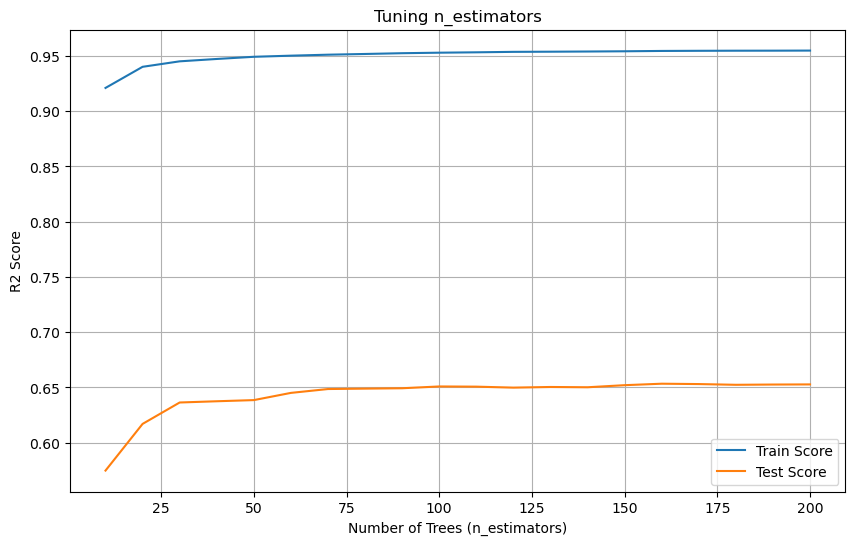

Best number of trees (n_estimators): 160


In [22]:
import numpy as np
import matplotlib.pyplot as plt

n_estimators_range = np.arange(10, 201, 10)
train_scores = []
test_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label="Train Score")
plt.plot(n_estimators_range, test_scores, label="Test Score")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Tuning n_estimators")
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_range[np.argmax(test_scores)]
print(f"Best number of trees (n_estimators): {best_n_estimators}")

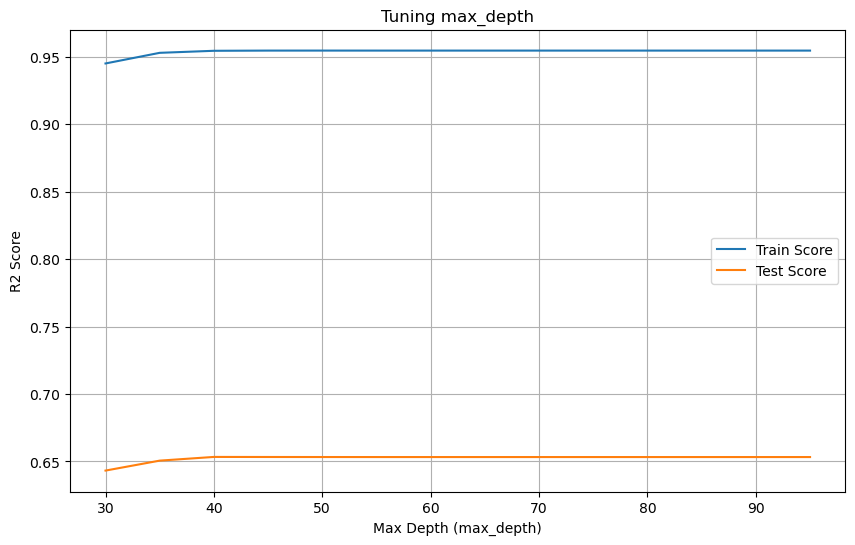

Best max depth: 40


In [24]:
max_depth_range = np.arange(30, 100, 5)
train_scores = []
test_scores = []

for depth in max_depth_range:
    model = RandomForestRegressor(
        n_estimators=best_n_estimators, max_depth=depth, random_state=0
    )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label="Train Score")
plt.plot(max_depth_range, test_scores, label="Test Score")
plt.xlabel("Max Depth (max_depth)")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Tuning max_depth")
plt.grid(True)
plt.show()

best_max_depth = max_depth_range[np.argmax(test_scores)]
print(f"Best max depth: {best_max_depth}")

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": np.arange(150, 176, 1), "max_depth": np.arange(30, 41, 1)}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# print the best param
print(f"Best parameters: {grid_search.best_params_}")

# save the best score
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Score of the best model on the test set: {test_score:.4f}")

Fitting 5 folds for each of 286 candidates, totalling 1430 fits
Best parameters: {'max_depth': 40, 'n_estimators': 175}
Score of the best model on the test set: 0.6522


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": np.arange(170, 185, 1), "max_depth": np.arange(35, 51, 1)}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# print the best param
print(f"Best parameters: {grid_search.best_params_}")

# save the best score
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Score of the best model on the test set: {test_score:.4f}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'max_depth': 44, 'n_estimators': 184}
Score of the best model on the test set: 0.6523


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": np.arange(180, 200, 5), "max_depth": np.arange(42, 46, 1)}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# print the best param
print(f"Best parameters: {grid_search.best_params_}")

# save the best score
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Score of the best model on the test set: {test_score:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 43, 'n_estimators': 195}
Score of the best model on the test set: 0.6525


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": np.arange(190, 200, 1), "max_depth": np.arange(42, 45, 1)}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# print the best param
print(f"Best parameters: {grid_search.best_params_}")

# save the best score
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Score of the best model on the test set: {test_score:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'max_depth': 43, 'n_estimators': 192}
Score of the best model on the test set: 0.6526
